In [37]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread, imsave
from skimage.transform import resize
import torch as th
from torch.utils.data import DataLoader

from PoisDenoiser import dataset_loader
from PoisDenoiser.utils import show_images as show

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


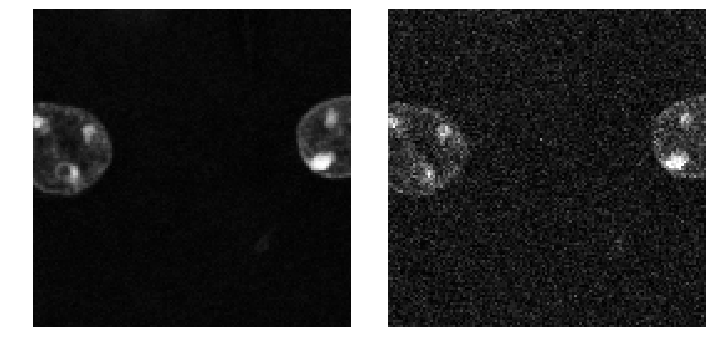

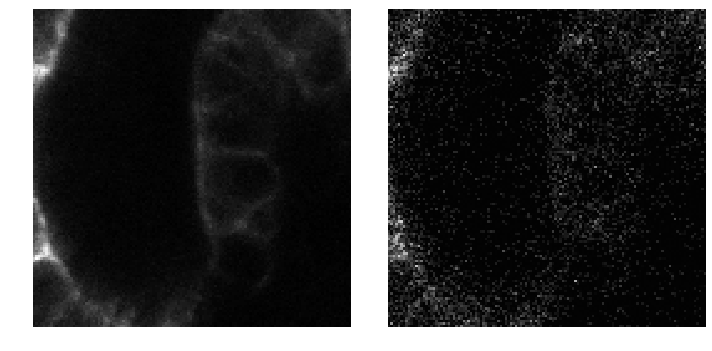

In [53]:
fmd = dataset_loader.FMD(get_name=False, exp='twophoton', trainorval='val')
show(fmd[2])

fmd = dataset_loader.FMD(get_name=False, exp='confocal', trainorval='val')
show(fmd[10])

In [18]:
path2dataset = './DATASETS/BSDS500/BSDS500_Pois_crops_PEAK_1/'

BSDStrain = dataset_loader.BSDS500(path2dataset+'train/')
BSDStrain_loader = DataLoader(BSDStrain, batch_size=5, shuffle=True, num_workers=1)

BSDSval = dataset_loader.BSDS500(path2dataset+'val/')
BSDSval_loader = DataLoader(BSDSval, batch_size=100, shuffle=False, num_workers=1)

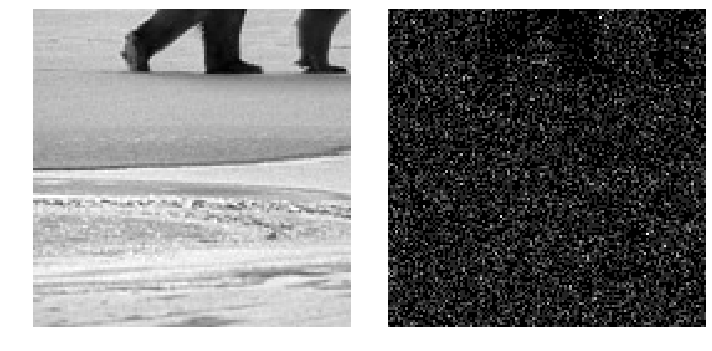

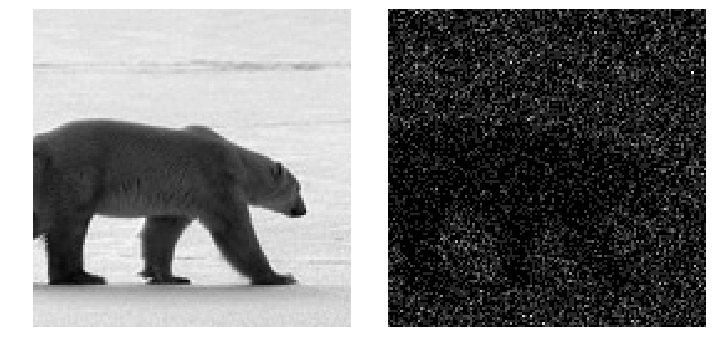

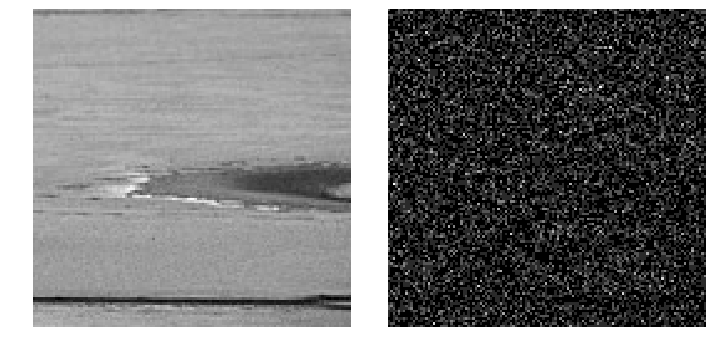

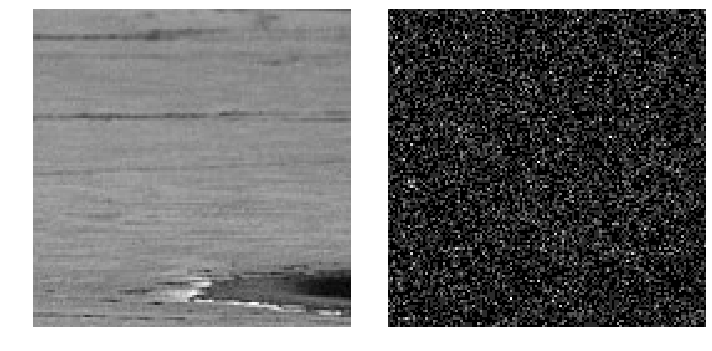

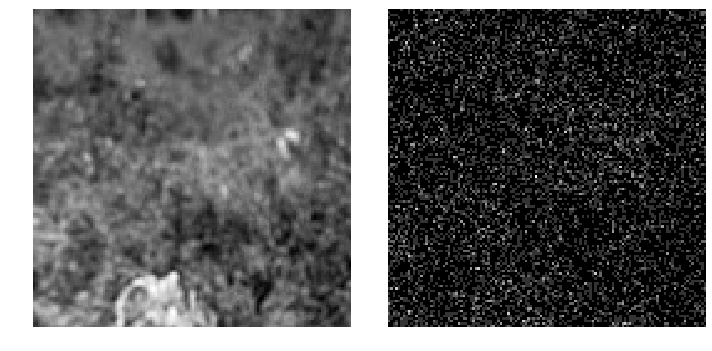

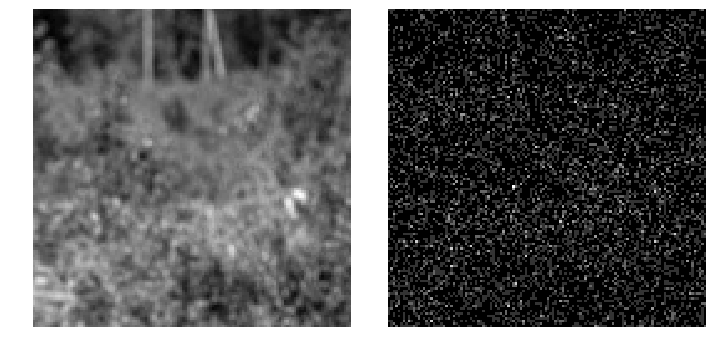

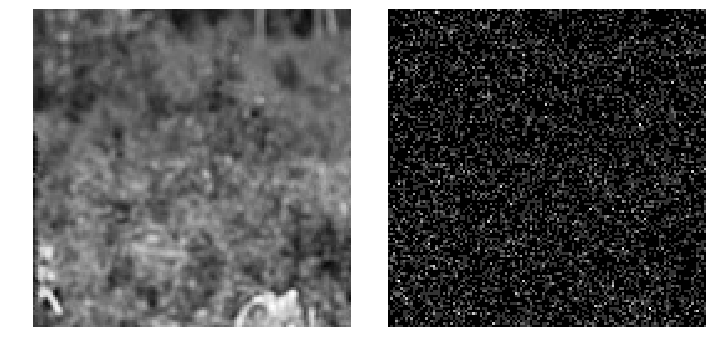

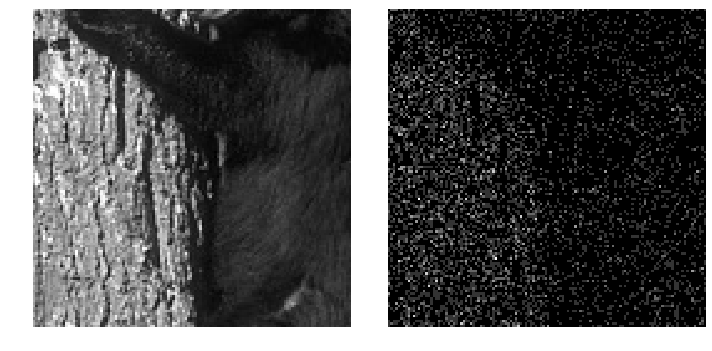

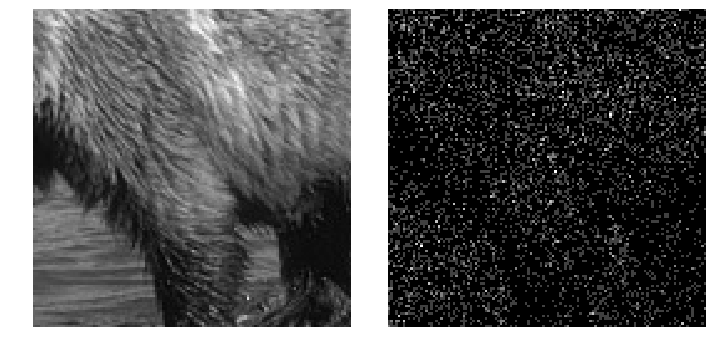

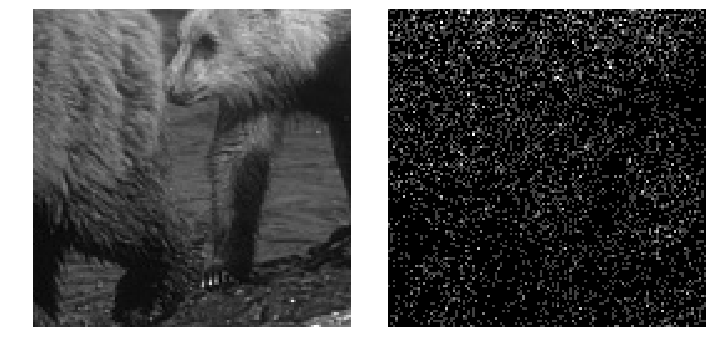

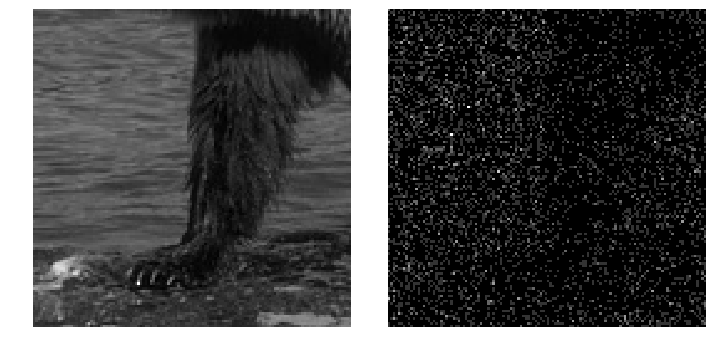

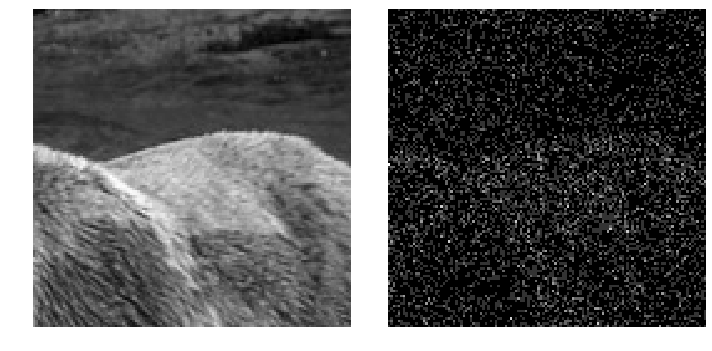

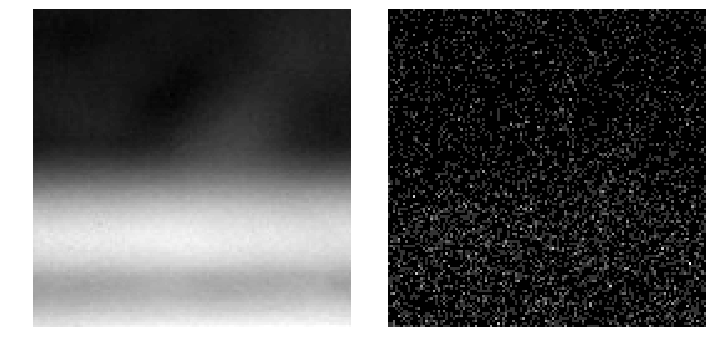

In [16]:
for i in range(13):
    show(BSDStrain[i])

In [10]:
len(BSDSval)

100

In [11]:
for i,j in BSDSval_loader:
    break

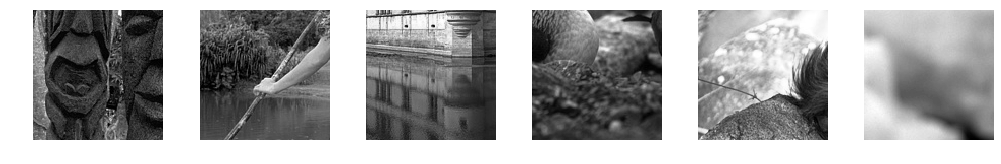

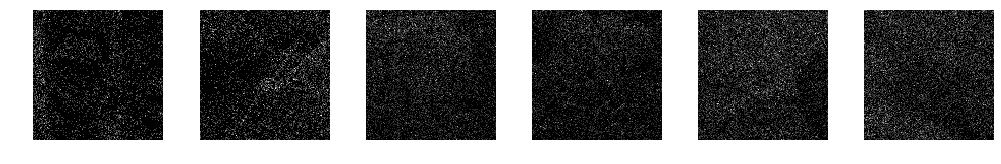

In [12]:
show([i[0],i[1], i[2],i[3], i[4], i[5]])
show([j[0],j[1], j[2],j[3], j[4], j[5]])

In [95]:
for g,n in BSDSval_loader:
    break
  

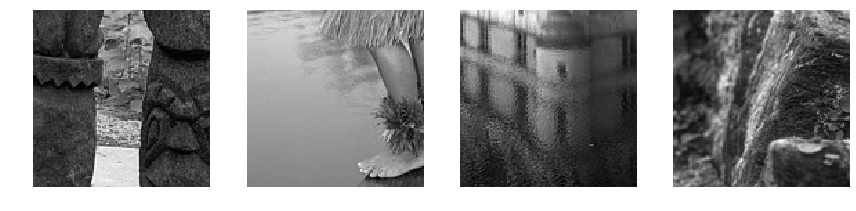

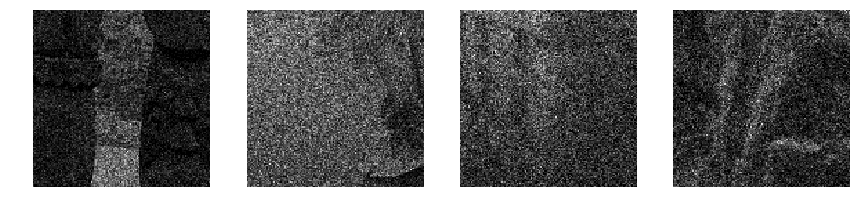

In [96]:
show([g[0],g[1], g[2],g[3]])
show([n[0],n[1], n[2],n[3]])

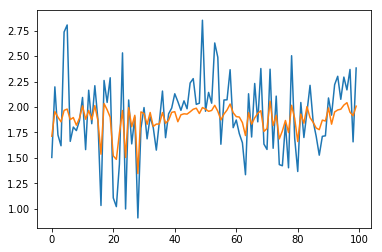

In [106]:
from skimage.restoration import estimate_sigma as sigma

gt = g.clone()*2
noisy = th.clamp(gt + 2*th.randn_like(gt), 0, float('Inf'))

sigmas_pois, sigmas_gaus = [], []
for i in range(100):
    sigmas_pois.append(sigma(n[i][0].numpy()))
    sigmas_gaus.append(sigma(noisy[i][0].numpy()))

plt.plot(sigmas_pois)
plt.plot(sigmas_gaus)

In [107]:
np.average(sigmas_gaus), np.average(sigmas_pois) 

(1.8832150456141088, 1.9157879749328361)